In [108]:
import numpy as np
import pandas as pd


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
# from scoring_functions import scoring_functions as f

# imp allows to reload the above function file when tinkering with it without kernel restart
import imp

import matplotlib.pyplot as plt

In [109]:
def scoring(y_real, y_pred, model, X_data): # change y_test to y_real
    # Calculates and prints scores for the model
    accuracy = accuracy_score(y_real, y_pred)
    precision = precision_score(y_real, y_pred, average='macro')
    recall = recall_score(y_real, y_pred, average='macro')
    f1 = f1_score(y_real, y_pred, average='macro')

    print("Accuracy: {:.1%}".format(accuracy))
    print("Precision: {:.1%}".format(precision))
    print("Recall: {:.1%}".format(recall))
    print("F1: {:.1%}".format(f1))

    print('\n')
    print("Classification Report")
    print('\n')
    print(classification_report(y_real, y_pred))
    # Plots a confusion matrix graphic (defined below)
    plot = plot_c_matrix(model, X_data, y_real)

# note that plot_confustion_matrix needs to rerun the model. That's what you pass in the model again. 
def plot_c_matrix(model, X_test, y_real):
    # Generates a confusion matrix graphic
    plot_confusion_matrix(model, X_test, y_real)
    plt.grid(False)
    plt.show()


In [157]:
df = pd.read_csv('data_files/text_processed.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [111]:
df.head()

,topic,text
0,other,bahia cocoa review salvador feb shower continu...
1,blank,standard oil form financial unit cleveland feb...
2,blank,texas commerce bancshares file plan houston fe...
3,blank,talking equity offer janie gabbett reuters los...
4,other,national average price reserve washington feb ...


In [112]:
df.shape

(22999, 2)

## Change topic names to integers

In [113]:
df.topic.unique()

array(['other', 'blank', 'earn'], dtype=object)

In [158]:
topic_dict = {'earn': 1, 'other': 2, 'blank': 3}

In [159]:
df.topic.replace(topic_dict, inplace=True)

In [116]:
df.topic.unique()

array([2, 3, 1], dtype=int64)

In [160]:
print(f"Topic 1: {round((sum(df.topic == 1)/len(df.topic)) *100, 2)}%")
print(f"Topic 2: {round((sum(df.topic == 2)/len(df.topic)) *100, 2)}%")
print(f"Topic 3: {round((sum(df.topic == 3)/len(df.topic)) *100, 2)}%")

Topic 1: 18.51%
Topic 2: 33.99%
Topic 3: 47.5%


## Train-Test Split

In [117]:
X = df.drop(['topic'], axis=1)
y = df['topic']

X_train, X_test, y_train, y_test = train_test_split(X['text'], y, test_size=0.20, random_state=200)

In [118]:
X_train

8654     first union acquisition approved jacksonville ...
15548    london eurodollar deposit rate april overnight...
12409    denmark mln crown eurobond deal copenhagen mar...
4370     nova subsidiary raise polyethylene price calga...
19981    amoco canada offer top one billion dlrs toront...
                               ...                        
9036     delegation hope veg oil tax defeat bonn march ...
14007    coffee export quota october seems unlikely ico...
784      anchor glass cleared listed nyse tampa march a...
12905    midland set subsidiary finland london march mi...
1818     syntex set rapid strep throat test palo alto m...
Name: text, Length: 18399, dtype: object

In [119]:
y_train

8654     2
15548    3
12409    3
4370     2
19981    3
        ..
9036     2
14007    2
784      3
12905    3
1818     3
Name: topic, Length: 18399, dtype: int64

In [120]:
print(X_test.shape)
X_train.shape

(4600,)


(18399,)

In [121]:
print(y_test.shape)
y_train.shape

(4600,)


(18399,)

# TF-IDF

## Instatiate Training Set

In [122]:
vectorizer = TfidfVectorizer(ngram_range=(1,2))
vect_X_train = vectorizer.fit_transform(X_train)
feature_names =  vectorizer.get_feature_names()

In [123]:
len(feature_names)

602453

In [124]:
vect_X_train.shape

(18399, 602453)

Use `fit_transform()` on training data and `transform()` on test data. The model has already been fit on the training data, so you don't want to fit it again.

In [125]:
vect_X_test = vectorizer.transform(X_test)

# Create first model

## Create Naive Bayes model and predict

Instantiate new model instance. Fit the model to all the training data.

In [126]:
cls = MultinomialNB()
cls.fit(vect_X_train, y_train)

MultinomialNB()

Now that the model has been trained on the vectorized training data, see how it will predict classes from that test data.

In [127]:
y_pred = cls.predict(vect_X_train)

In [128]:
np.unique(y_pred)

array([1, 2, 3], dtype=int64)

Compare how accurate the real test data is to what the model predicted

In [129]:
f'The accuracy score is: {round(accuracy_score(y_train, y_pred)*100, 2)}%'

'The accuracy score is: 89.39%'

Accuracy: 89.4%
Precision: 91.8%
Recall: 87.0%
F1: 88.9%


Classification Report


              precision    recall  f1-score   support

           1       0.95      0.79      0.86      3448
           2       0.96      0.85      0.90      6236
           3       0.84      0.96      0.90      8715

    accuracy                           0.89     18399
   macro avg       0.92      0.87      0.89     18399
weighted avg       0.90      0.89      0.89     18399



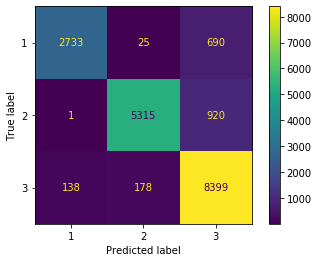

In [130]:
scoring(y_train, y_pred, cls, vect_X_train)

Pretty good!

## Try it when merging 'blank' and 'other' into one topic 

In [131]:
df2 = pd.read_csv('data_files/text_processed.csv')
df2.drop(['Unnamed: 0'], axis=1, inplace=True)
topic_dict = {'earn': 1, 'other': 2, 'blank': 2}
df2.topic.replace(topic_dict, inplace=True)

In [132]:
df2.head(10)

,topic,text
0,2,bahia cocoa review salvador feb shower continu...
1,2,standard oil form financial unit cleveland feb...
2,2,texas commerce bancshares file plan houston fe...
3,2,talking equity offer janie gabbett reuters los...
4,2,national average price reserve washington feb ...
5,2,argentine registration buenos aire feb argenti...
6,2,red lion inn file plan offering portland feb r...
7,2,usx debt dowgraded moody new york feb moody in...
8,1,champion product approves stock split rocheste...
9,2,computer terminal system completes sale commac...


In [156]:
print(f"Topic 1: {round((sum(df2.topic == 1)/len(df2.topic)) *100, 2)}%")
print(f"Topic 2: {round((sum(df2.topic == 2)/len(df2.topic)) *100, 2)}%")

Topic 1: 18.51%
Topic 2: 81.49%


In [133]:
X2 = df2.drop(['topic'], axis=1)
y2 = df2['topic']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2['text'], y2, test_size=0.20, random_state=200)

In [134]:
vect_X2_train = vectorizer.fit_transform(X2_train)
vect_X2_test = vectorizer.transform(X2_test)

In [135]:
cls2 = MultinomialNB()
cls2.fit(vect_X2_train, y2_train)
y2_pred = cls2.predict(vect_X2_train)

Accuracy: 94.6%
Precision: 95.5%
Recall: 86.4%
F1: 90.1%


Classification Report


              precision    recall  f1-score   support

           1       0.97      0.73      0.83      3448
           2       0.94      0.99      0.97     14951

    accuracy                           0.95     18399
   macro avg       0.96      0.86      0.90     18399
weighted avg       0.95      0.95      0.94     18399



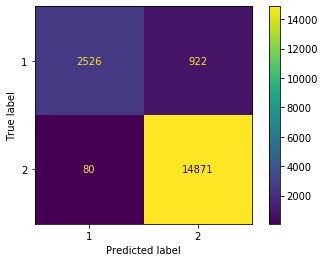

In [136]:
scoring(y2_train, y2_pred, cls2, vect_X2_train)

Making a df to easily compare how the two models did

In [141]:
compare = pd.DataFrame(columns=['3_topics', '2_topics'])

compare.loc['overall accuracy'] = [89.4, 94.6]
compare.loc['overall precision'] = [91.8, 95.5]
compare.loc['overall recall'] = [87.0, 86.4]
compare.loc['overall F1'] = [88.9, 90.1]
compare.loc['earn precision'] = [95, 97]
compare.loc['earn recall'] = [79, 73]
compare.loc['earn F1'] = [86, 83]
compare

,3_topics,2_topics
overall accuracy,89.4,94.6
overall precision,91.8,95.5
overall recall,87.0,86.4
overall F1,88.9,90.1
earn precision,95.0,97.0
earn recall,79.0,73.0
earn F1,86.0,83.0


The models did pretty similar with some trade offs here and there. Overall accuracy was 5 points better on the model with two topics.

The purpose of this task is to predict the articles that can be classified as 'earn'. 

'Earn' precision preformed 2 points better with two topics, but 'earn' recall performed 6 points worse with two topics. 'Earn' F1 was 3 points better.



## Check for overfitting

In [161]:
test_y_pred = cls.predict(vect_X_test)

Accuracy: 82.8%
Precision: 87.2%
Recall: 80.3%
F1: 82.7%


Classification Report


              precision    recall  f1-score   support

           1       0.93      0.77      0.84       808
           2       0.92      0.70      0.80      1582
           3       0.76      0.94      0.84      2210

    accuracy                           0.83      4600
   macro avg       0.87      0.80      0.83      4600
weighted avg       0.85      0.83      0.83      4600



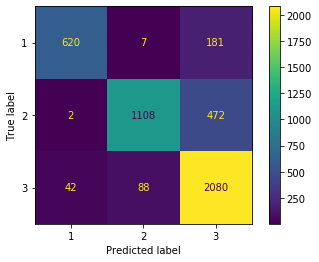

In [162]:
scoring(y_test, test_y_pred, cls, vect_X_test)

Accuracy: 89.4%
Precision: 91.8%
Recall: 87.0%
F1: 88.9%


Classification Report


              precision    recall  f1-score   support

           1       0.95      0.79      0.86      3448
           2       0.96      0.85      0.90      6236
           3       0.84      0.96      0.90      8715

    accuracy                           0.89     18399
   macro avg       0.92      0.87      0.89     18399
weighted avg       0.90      0.89      0.89     18399



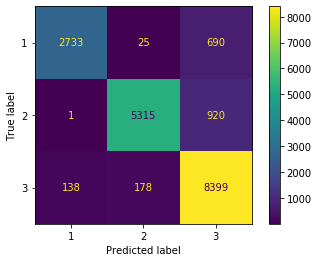

In [164]:
# This is the first one, above
scoring(y_train, y_pred, cls, vect_X_train)

Overall accuracy is down a little (7 points), but for the category 'earn', indivdual scores are down fewer points, maybe 2 or 3.

## Random Forest

In [165]:
rdmfst = RandomForestClassifier(max_depth=20)
rdmfst.fit(vect_X_train, y_train)

RandomForestClassifier(max_depth=20)

In [166]:
y_pred = rdmfst.predict(vect_X_train)

Accuracy: 71.7%
Precision: 86.8%
Recall: 67.6%
F1: 69.7%


Classification Report


              precision    recall  f1-score   support

           1       0.98      0.69      0.81      3448
           2       1.00      0.35      0.51      6236
           3       0.63      0.99      0.77      8715

    accuracy                           0.72     18399
   macro avg       0.87      0.68      0.70     18399
weighted avg       0.82      0.72      0.69     18399



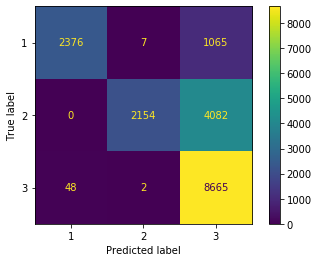

In [167]:
scoring(y_train, y_pred, rdmfst, vect_X_train)

Overall, a worse model. 

## Decision Tree

In [168]:
dtree = DecisionTreeClassifier(max_depth=20)
dtree.fit(vect_X_train, y_train)

DecisionTreeClassifier(max_depth=20)

In [169]:
y_pred = dtree.predict(vect_X_train)
f'The accuracy score is: {round(accuracy_score(y_train, y_pred)*100, 2)}%'

'The accuracy score is: 87.54%'

Accuracy: 87.5%
Precision: 90.9%
Recall: 87.3%
F1: 88.4%


Classification Report


              precision    recall  f1-score   support

           1       0.97      0.93      0.95      3448
           2       0.94      0.72      0.82      6236
           3       0.81      0.96      0.88      8715

    accuracy                           0.88     18399
   macro avg       0.91      0.87      0.88     18399
weighted avg       0.89      0.88      0.87     18399



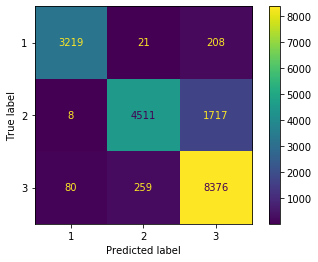

In [170]:
scoring(y_train, y_pred, dtree, vect_X_train)

Seems pretty good, as good or better than NB

### Check for overfitting

In [171]:
test_y_pred = dtree.predict(vect_X_test)

Accuracy: 79.6%
Precision: 82.2%
Recall: 79.9%
F1: 80.5%


Classification Report


              precision    recall  f1-score   support

           1       0.89      0.88      0.88       808
           2       0.82      0.65      0.72      1582
           3       0.76      0.88      0.81      2210

    accuracy                           0.80      4600
   macro avg       0.82      0.80      0.81      4600
weighted avg       0.80      0.80      0.79      4600



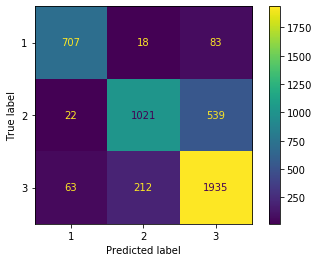

In [172]:
scoring(y_test, test_y_pred, dtree, vect_X_test)

At a quick glance, seems to have some problem with overfitting, espectially with 'earn' precision, but overall not too bad.

## KNN

In [173]:
neigh = KNeighborsClassifier(n_neighbors=5, weights='distance')
neigh.fit(vect_X_train, y_train)

KNeighborsClassifier(weights='distance')

In [175]:
y_pred = neigh.predict(vect_X_train)
f'The accuracy score is: {round(accuracy_score(y_train, y_pred)*100, 2)}%'

'The accuracy score is: 99.83%'

Accuracy: 99.8%
Precision: 99.8%
Recall: 99.8%
F1: 99.8%


Classification Report


              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3448
           2       1.00      1.00      1.00      6236
           3       1.00      1.00      1.00      8715

    accuracy                           1.00     18399
   macro avg       1.00      1.00      1.00     18399
weighted avg       1.00      1.00      1.00     18399



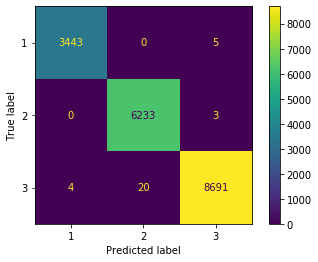

In [176]:
scoring(y_train, y_pred, neigh, vect_X_train)

Almost perfect! 

### Check for overfitting

In [179]:
test_y_pred = neigh.predict(vect_X_test)

Accuracy: 84.5%
Precision: 84.3%
Recall: 85.0%
F1: 84.6%


Classification Report


              precision    recall  f1-score   support

           1       0.84      0.89      0.86       808
           2       0.84      0.81      0.82      1582
           3       0.85      0.86      0.85      2210

    accuracy                           0.84      4600
   macro avg       0.84      0.85      0.85      4600
weighted avg       0.84      0.84      0.84      4600



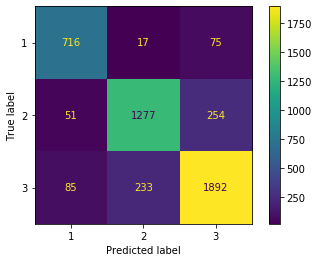

In [181]:
scoring(y_test, test_y_pred, neigh, vect_X_test)

Does seem to have an issue with overfitting, almost 15 point difference with accuracy

## XGBoost

In [186]:
xgb = XGBClassifier()

In [187]:
xgb.fit(vect_X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [188]:
y_pred = xgb.predict(vect_X_train)
f'The accuracy score is: {round(accuracy_score(y_train, y_pred)*100, 2)}%'

'The accuracy score is: 84.68%'

Accuracy: 84.7%
Precision: 87.6%
Recall: 84.6%
F1: 85.5%


Classification Report


              precision    recall  f1-score   support

           1       0.94      0.91      0.92      3448
           2       0.90      0.70      0.79      6236
           3       0.79      0.92      0.85      8715

    accuracy                           0.85     18399
   macro avg       0.88      0.85      0.86     18399
weighted avg       0.86      0.85      0.84     18399



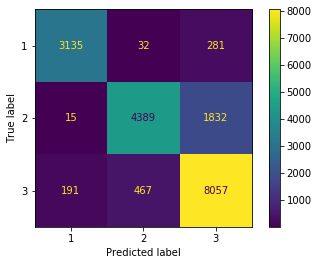

In [189]:
scoring(y_train, y_pred, xgb, vect_X_train)

An OK model, but not as strong as Naive Bayes or KNN

### Check for overfitting

In [190]:
test_y_pred = xgb.predict(vect_X_test)

Accuracy: 81.5%
Precision: 84.0%
Recall: 82.1%
F1: 82.6%


Classification Report


              precision    recall  f1-score   support

           1       0.91      0.90      0.90       808
           2       0.84      0.68      0.75      1582
           3       0.77      0.88      0.82      2210

    accuracy                           0.81      4600
   macro avg       0.84      0.82      0.83      4600
weighted avg       0.82      0.81      0.81      4600



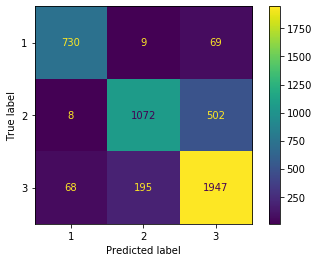

In [191]:
scoring(y_test, test_y_pred, xgb, vect_X_test)

Pretty good on not overfitting